In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows',500)


In [2]:
data_path = (r'C:\Users\aditya\eds_covid-19\data\raw\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')
pd_raw=pd.read_csv(data_path)


In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,180864,181120,181178,181236,181465,181534,181574
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276583,276638,276690,276731,276731,276821,276821,276821,277141,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265920,265925,265925,265927,265937,265943,265952,265964,265968,265971
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/9/22', '6/10/22', '6/11/22', '6/12/22', '6/13/22', '6/14/22',
       '6/15/22', '6/16/22', '6/17/22', '6/18/22'],
      dtype='object', length=879)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot= pd.DataFrame({
    'date' : time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [8]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
dtype: int64

In [9]:
country_list=['Italy',
             'US',
             'Spain',
             'Germany',
             'Korea, South',
             ]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

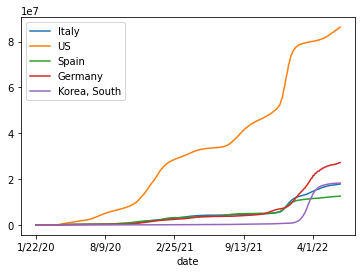

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [13]:
from datetime import datetime
time_idx=[datetime.strptime(each, "%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [14]:
df_plot['date']= time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [16]:
df_plot.to_csv('C:/Users/aditya/eds_covid-19/data/processed/COVID_small_flat_table.csv', sep=';')

In [17]:
data_path = (r'C:\Users\aditya\eds_covid-19\data\raw\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')
pd_raw=pd.read_csv(data_path)
pd_raw.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,180864,181120,181178,181236,181465,181534,181574
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276583,276638,276690,276731,276731,276821,276821,276821,277141,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265920,265925,265925,265927,265937,265943,265952,265964,265968,265971
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [18]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                   'Province/State':'state'})

In [19]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180864,180864,180864,180864,181120,181178,181236,181465,181534,181574
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276583,276638,276690,276731,276731,276821,276821,276821,277141,277141
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265920,265925,265925,265927,265937,265943,265952,265964,265968,265971
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43449,43449,43449,43449
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [20]:
test_pd=pd_data_base.set_index(['state', 'country']).T

In [21]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [22]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
250510,6/18/22,Western Australia,Australia,851776.0
250511,6/18/22,Xinjiang,China,1008.0
250512,6/18/22,Yukon,Canada,4430.0
250513,6/18/22,Yunnan,China,2162.0


In [23]:
test_pd.dtypes

state                                         country                         
NaN                                           Afghanistan                         int64
                                              Albania                             int64
                                              Algeria                             int64
                                              Andorra                             int64
                                              Angola                              int64
                                              Antarctica                          int64
                                              Antigua and Barbuda                 int64
                                              Argentina                           int64
                                              Armenia                             int64
Australian Capital Territory                  Australia                           int64
New South Wales                          

In [24]:
df_plot.to_csv('C:/Users/aditya/eds_covid-19/data/processed/COVID_small_flat_table.csv', sep=';',index=False)